In [ ]:
#importing needed lib

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling
from datetime import datetime


%matplotlib inline
sns.set(rc={'figure.figsize':(10,6)}, font_scale=1.2)

In [71]:
import pandas_profiling as pdf

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [68]:
import joblib

In [5]:
# First Data 

In [69]:
df = pd.read_excel('CS.xlsx' , sheet_name = 'Sheet1')
df.head(5)

,Object Name,Display Date,Entered,Offer_Grade
0,Company_A,2019-01-01,18379,4
1,Company_B,2019-01-01,6590,2
2,Company_C,2019-01-01,7817,5
3,Company_D,2019-01-01,3349,4
4,Company_E,2019-01-01,623,5


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3655 entries, 0 to 3654
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Object Name   3655 non-null   object        
 1   Display Date  3655 non-null   datetime64[ns]
 2   Entered       3655 non-null   int64         
 3   Offer_Grade   3655 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 114.3+ KB


In [8]:
df['Year'] = df['Display Date'].dt.year
df['Month'] = df['Display Date'].dt.month
df['Day'] = df['Display Date'].dt.day
df['Day_Name'] = df['Display Date'].dt.day_name()
df['Day_Name'] = df['Display Date'].dt.day_name()
df['Week_Day'] = df['Display Date'].dt.weekday
df .head()

,Object Name,Display Date,Entered,Offer_Grade,Year,Month,Day,Day_Name,Week_Day
0,Company_A,2019-01-01,18379,4,2019,1,1,Tuesday,1
1,Company_B,2019-01-01,6590,2,2019,1,1,Tuesday,1
2,Company_C,2019-01-01,7817,5,2019,1,1,Tuesday,1
3,Company_D,2019-01-01,3349,4,2019,1,1,Tuesday,1
4,Company_E,2019-01-01,623,5,2019,1,1,Tuesday,1


<AxesSubplot:xlabel='Day_Name', ylabel='Entered'>

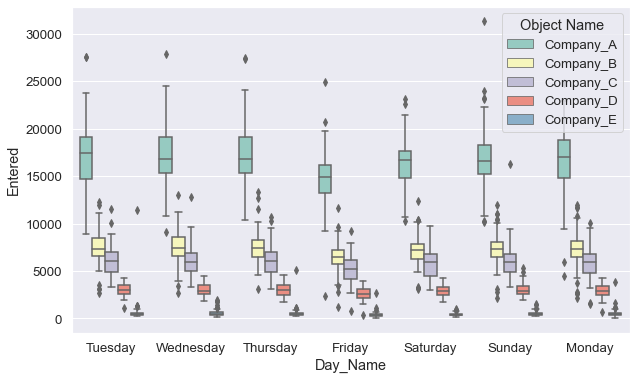

In [9]:
sns.boxplot(x="Day_Name", y="Entered", hue='Object Name',data=df, palette='Set3')

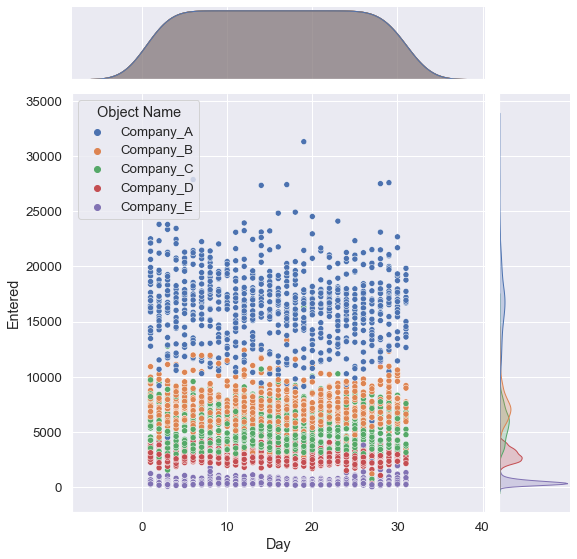

In [10]:
sns.jointplot(y='Entered', x='Day', data=df, height=8, color='m' , hue='Object Name')

<AxesSubplot:xlabel='Month', ylabel='Entered'>

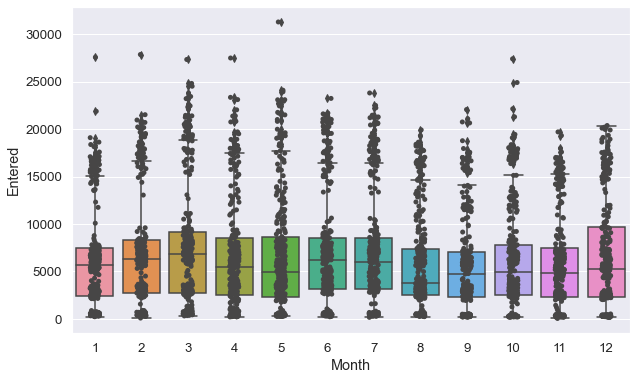

In [11]:
sns.boxplot(x="Month", y="Entered", data=df)
sns.stripplot(x="Month", y="Entered", color="#474646", size=5, data=df)

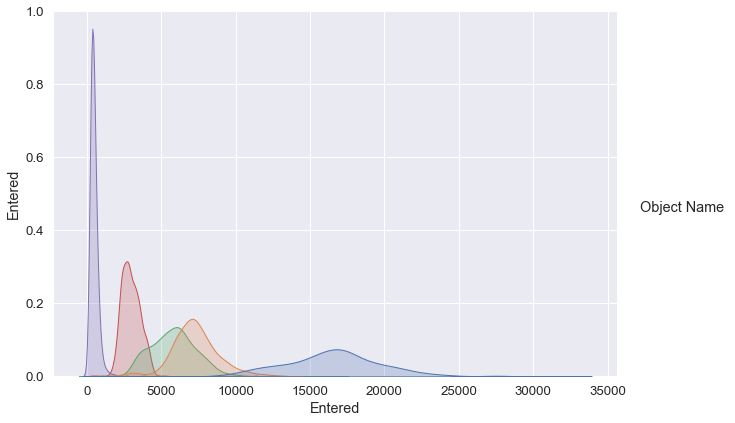

In [12]:
sns.pairplot(df, hue='Object Name',  vars= ['Entered'], height=6, aspect=1.5)

<AxesSubplot:xlabel='Month', ylabel='Offer_Grade'>

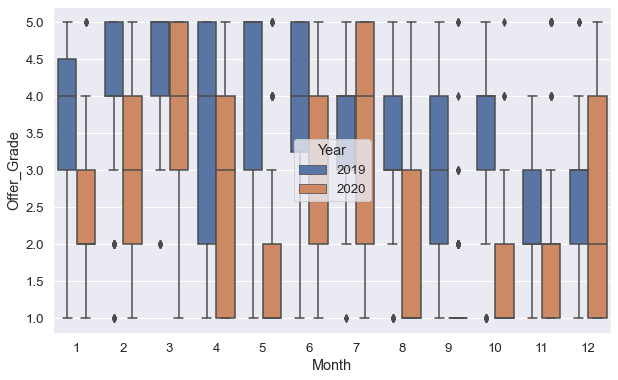

In [13]:
sns.boxplot(x="Month", y="Offer_Grade", data=df , hue = 'Year' )

In [14]:
#Start Machine Learning Model

In [15]:
df = pd.get_dummies(df, columns=['Object Name'], drop_first=True)

In [16]:
df.drop(['Day_Name','Display Date'] , axis = 1 ,  inplace = True )

In [17]:
df.columns

Index(['Entered', 'Offer_Grade', 'Year', 'Month', 'Day', 'Week_Day',
       'Object Name_Company_B', 'Object Name_Company_C',
       'Object Name_Company_D', 'Object Name_Company_E'],
      dtype='object')

In [18]:
df[['Entered', 'Year', 'Month', 'Day', 'Week_Day', 'Offer_Grade',
       'Object Name_Company_B', 'Object Name_Company_C',
       'Object Name_Company_D', 'Object Name_Company_E']]

,Entered,Year,Month,Day,Week_Day,Offer_Grade,Object Name_Company_B,Object Name_Company_C,Object Name_Company_D,Object Name_Company_E
0,18379,2019,1,1,1,4,0,0,0,0
1,6590,2019,1,1,1,2,1,0,0,0
2,7817,2019,1,1,1,5,0,1,0,0
3,3349,2019,1,1,1,4,0,0,1,0
4,623,2019,1,1,1,5,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
3650,14558,2020,12,31,3,2,0,0,0,0
3651,8981,2020,12,31,3,5,1,0,0,0
3652,3162,2020,12,31,3,1,0,1,0,0
3653,2158,2020,12,31,3,1,0,0,1,0


In [19]:
x = df.drop(['Entered'], axis=1)
y = df['Entered']

In [20]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [21]:
scaler= StandardScaler()

scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [23]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*10)

Using model: LR
Training Score: 0.9573416327087194
Test Score: 0.9472174254218145
----------
Using model: KNNR
Training Score: 0.9868152493707837
Test Score: 0.9730132889755654
----------
Using model: SVR
Training Score: -0.017756586707487143
Test Score: -0.010497481425347344
----------
Using model: DT
Training Score: 1.0
Test Score: 0.9630542197531832
----------
Using model: RF
Training Score: 0.9979443606784317
Test Score: 0.9778167073510664
----------
Using model: XGBR
Training Score: 0.9976673425366872
Test Score: 0.9814699949995515
----------


C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [24]:
model = RandomForestRegressor()
model.fit(x_train, y_train)

RandomForestRegressor()

In [25]:
y_pred = model.predict(x_test)
y_pred

array([  337.38,  2547.22, 17796.33, 18292.97,   670.54,  4049.62,
        6411.99,  5822.89, 16692.86, 12406.04, 15000.59, 15077.76,
        5761.12,   518.71,  7858.14,  6635.43, 16610.55,   326.51,
        8211.49, 11368.36,  6512.76,  5890.12,  6665.29,   345.99,
        4999.13,  5648.91,  1892.96,  2543.91, 20285.06,  6551.06,
        3060.03,  7847.55,  2879.92,   410.56, 17855.54,  6566.18,
        6805.71,  6616.7 , 17884.59,   230.35,  7708.32,   405.25,
        3161.02,  2592.91,  9360.64,  3730.92,  4120.19,  7112.76,
         518.7 ,  3613.55, 18195.32,  2516.26,  7380.03, 14968.5 ,
       16780.77,  3323.34,  3289.88,  3600.31, 16818.38,  2060.94,
       17992.8 ,  3684.3 ,  7187.91,  4941.77,  1043.64, 16795.58,
        3302.  ,  5902.77, 16565.6 ,  6427.01,   416.64,   487.42,
         231.13, 20477.94,  5185.38,   241.56,  6393.02, 11499.25,
        2498.75,  5727.26,  7941.14,  4750.68,  3719.93,  3362.44,
         428.2 ,  7910.87, 11519.62,  3959.14,  3928.59,  7481

In [26]:
y_test

2899      334
1658     2476
2840    17665
2030    18670
64        655
        ...  
1680    17422
251      6682
2941     3084
554       264
2651     7402
Name: Entered, Length: 731, dtype: int64

In [27]:
x.columns

Index(['Offer_Grade', 'Year', 'Month', 'Day', 'Week_Day',
       'Object Name_Company_B', 'Object Name_Company_C',
       'Object Name_Company_D', 'Object Name_Company_E'],
      dtype='object')

In [28]:
start_date = "2021-07-01"
end_date = "2021-07-31"
start_offer_date = "2021-07-15"
end_offer_date = "2021-07-22"
Offer_grad = 5
company = [1,0,0,0]

In [29]:
newdates = pd.Series(pd.date_range(start=start_date,end=end_date))
df2 = pd.DataFrame({'Display Date':newdates ,'Object Name_Company_B':company[0], 'Object Name_Company_C':company[1],
                    'Object Name_Company_D':company[2], 'Object Name_Company_E':company[3]})

In [30]:
offerdates = pd.Series(pd.date_range(start=start_offer_date,end=end_offer_date))
df3 = pd.DataFrame({'Display Date':offerdates , 'Offer_Grade' :Offer_grad })

In [31]:
df4 = pd.merge(df3, df2, how='right', on=['Display Date'])
df4 = df4.fillna(value = 0)

In [32]:
df4['Year'] = df4['Display Date'].dt.year
df4['Month'] = df4['Display Date'].dt.month
df4['Day'] = df4['Display Date'].dt.day
df4['Day_Name'] = df4['Display Date'].dt.day_name()
df4['Week_Day'] = df4['Display Date'].dt.weekday

In [33]:
df4.drop(['Display Date'] , axis = 1 ,  inplace = True )

In [34]:
df4.columns

Index(['Offer_Grade', 'Object Name_Company_B', 'Object Name_Company_C',
       'Object Name_Company_D', 'Object Name_Company_E', 'Year', 'Month',
       'Day', 'Day_Name', 'Week_Day'],
      dtype='object')

In [35]:
df4 =df4[['Offer_Grade', 'Year', 'Month', 'Day', 'Week_Day',
       'Object Name_Company_B', 'Object Name_Company_C',
       'Object Name_Company_D', 'Object Name_Company_E']]

df4.head(2)

,Offer_Grade,Year,Month,Day,Week_Day,Object Name_Company_B,Object Name_Company_C,Object Name_Company_D,Object Name_Company_E
0,0.0,2021,7,1,3,1,0,0,0
1,0.0,2021,7,2,4,1,0,0,0


In [36]:
#'Offer_Grade'

In [37]:
call_custom_data = scaler.transform(df4)

In [38]:
prediction = model.predict(call_custom_data)
prediction

array([3955.13, 3591.82, 3663.19, 3662.03, 4044.04, 4143.01, 4387.84,
       4312.42, 4104.52, 4205.92, 4125.92, 4135.43, 3811.47, 3771.37,
       9221.54, 9392.88, 9601.43, 9075.42, 8837.57, 8576.6 , 8519.95,
       8696.82, 4947.67, 4762.51, 4808.62, 4599.35, 4569.28, 4908.04,
       4725.44, 4259.91, 4270.17])

In [39]:
int(prediction.sum())

169687

In [40]:
joblib.dump(model, 'model01.h5')
joblib.dump(scaler, 'scaler01.h5')

['scaler01.h5']

In [41]:
#2nd Data Machine LEarning

In [70]:
df = pd.read_excel('CS.xlsx' , sheet_name = 'Sheet2')
df.head(5)

,Display Date,Company,Number of Calls T,Number Of Agents,Offer_Grade
0,2019-01-01,Company_A,524812,801.0,3.032258
1,2019-02-01,Company_A,518488,700.0,4.071429
2,2019-03-01,Company_A,605318,586.0,4.451613
3,2019-04-01,Company_A,535728,672.0,3.533333
4,2019-05-01,Company_A,630067,757.0,4.483871


In [72]:
df.profile_report()

Summarize dataset:   0%|          | 0/18 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [73]:
df.columns

Index(['Display Date', 'Company', 'Number of Calls T', 'Number Of Agents',
       'Offer_Grade'],
      dtype='object')

<AxesSubplot:xlabel='Number of Calls T', ylabel='Number Of Agents'>

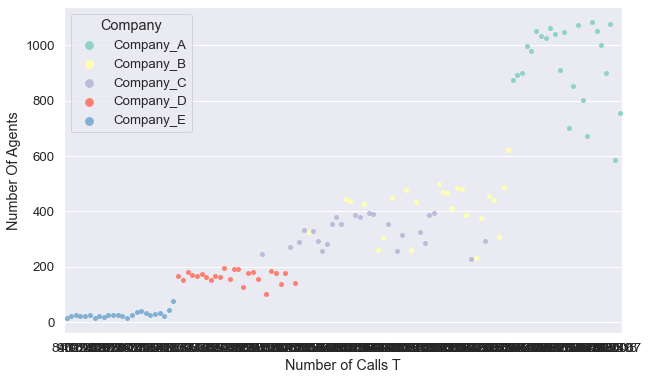

In [74]:
sns.stripplot(x="Number of Calls T", y="Number Of Agents", hue='Company',data=df, palette='Set3')

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Display Date       120 non-null    datetime64[ns]
 1   Company            120 non-null    object        
 2   Number of Calls T  120 non-null    int64         
 3   Number Of Agents   120 non-null    float64       
 4   Offer_Grade        120 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 4.8+ KB


In [44]:
df['Year'] = df['Display Date'].dt.year
df['Month'] = df['Display Date'].dt.month

df .head()

,Display Date,Company,Number of Calls T,Number Of Agents,Offer_Grade,Year,Month
0,2019-01-01,Company_A,524812,801.0,3.032258,2019,1
1,2019-02-01,Company_A,518488,700.0,4.071429,2019,2
2,2019-03-01,Company_A,605318,586.0,4.451613,2019,3
3,2019-04-01,Company_A,535728,672.0,3.533333,2019,4
4,2019-05-01,Company_A,630067,757.0,4.483871,2019,5


In [45]:
df = pd.get_dummies(df, columns=['Company'], drop_first=True)

In [46]:
df.drop(['Display Date'] , axis = 1 ,  inplace = True )

In [47]:
x = df.drop(['Number Of Agents'], axis=1)
y = df['Number Of Agents']

In [48]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [49]:
scaler2= StandardScaler()

scaler2.fit(x_train)

x_train = scaler2.transform(x_train)
x_test = scaler2.transform(x_test)

In [52]:
models = {
    "LR": LinearRegression(),
    "KNNR" : KNeighborsRegressor(), 
    "SVR": SVR(),
    "DT": DecisionTreeRegressor(),
    "RF": RandomForestRegressor(),
    "XGBR": XGBRegressor()
}

In [53]:
for name, model in models.items():
    print(f'Using model: {name}')
    model.fit(x_train, y_train)
    print(f'Training Score: {model.score(x_train, y_train)}')
    print(f'Test Score: {model.score(x_test, y_test)}')  
    print('-'*10)

Using model: LR
Training Score: 0.9562094398788867
Test Score: 0.9204138742189695
----------
Using model: KNNR
Training Score: 0.9679692842206145
Test Score: 0.9297181788096707
----------
Using model: SVR
Training Score: -0.032516806054325276
Test Score: -0.28289668527461087
----------
Using model: DT
Training Score: 1.0
Test Score: 0.8693799137417991
----------
Using model: RF
Training Score: 0.9917366470216449
Test Score: 0.9107968819206641
----------
Using model: XGBR
Training Score: 0.9999999995535722
Test Score: 0.9017233440277784
----------


C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +
C:\MyAnaconda\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [54]:
model2 = RandomForestRegressor()

model2.fit(x_train, y_train)

RandomForestRegressor()

In [55]:
y_pred = model2.predict(x_test)
y_pred

array([968.92906844, 148.26466857, 994.56      , 972.3376711 ,
       326.71904073, 317.91604804, 251.49610596, 385.9666894 ,
       762.45953422, 405.68799748, 960.51953422,  23.35877883,
       149.2812969 , 169.42633971, 963.28906844, 311.95890854,
       189.65568503, 171.0136859 , 949.04906844, 328.1110486 ,
       161.5357328 , 346.12325133, 307.84191722, 377.72435497,
        32.05438711, 315.70966174,  33.38441148, 985.26953422,
       288.38983473, 912.8530133 ])

In [56]:
y_test

3       672.000000
68      246.738011
15     1033.000000
9      1053.000000
55      390.422678
53      327.451842
76      143.371367
30      440.188734
4       757.000000
33      455.132737
1       700.000000
105      26.174134
73      128.115791
95      154.340850
7      1073.000000
70      289.005580
92      166.857489
82      169.760238
13     1041.000000
63      354.803841
87      154.121305
56      395.006972
61      380.291351
59      387.761960
98       21.777099
62      385.633091
115      41.221794
0       801.000000
52      291.939046
23     1084.000000
Name: Number Of Agents, dtype: float64

In [57]:
x.columns

Index(['Number of Calls T', 'Offer_Grade', 'Year', 'Month',
       'Company_Company_B', 'Company_Company_C', 'Company_Company_D',
       'Company_Company_E'],
      dtype='object')

In [58]:
start_date = "2021-05-01"
end_date = "2021-05-31"
start_offer_date = "2021-05-15"
end_offer_date = "2021-05-22"
Offer_grad = 5
company = [1,0,0,0]

In [59]:
int(end_date.split('-')[0])

2021

In [60]:
int(end_date.split('-')[1])

5

In [61]:
Offer_grad

5

In [62]:
pre_input_with_Calls = {'Number of Calls T':int(prediction.sum()), 'Offer_Grade':Offer_grad, 'Year':int(end_date.split('-')[0]), 'Month':int(end_date.split('-')[1]) ,'Company_Company_B':company[0], 'Company_Company_C':company[1], 'Company_Company_D':company[2],'Company_Company_E':company[3]}

call_custom_data = np.array(list(pre_input_with_Calls.values()))

call_custom_data = scaler2.transform([call_custom_data])

agent_prediction = model2.predict(call_custom_data)

In [63]:
int(agent_prediction)

324

In [64]:
joblib.dump(model2, 'model02.h5')
joblib.dump(scaler2, 'scaler02.h5')

['scaler02.h5']